In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Example of using numpy, pandas, and matplotlib

## Creating dataframe

In [8]:
df = pd.DataFrame(columns=['A', 'B', 'C'])

for col in df.columns:
    df[col] = np.random.lognormal(size=1000)

df['D'] = df['A'] * df['B']

df.head()

,A,B,C,D
0,1.369399,0.230245,0.362621,0.315298
1,0.280370,0.836865,0.571533,0.234631
2,0.293194,1.092368,14.555755,0.320275
3,0.783654,2.118279,0.661922,1.659998
4,0.829743,3.120432,1.871029,2.589155


## Taking the log, plotting the results

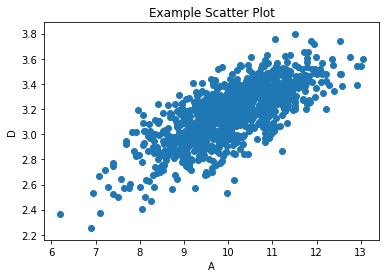

In [9]:
# Try out square rooting D

df_mod = np.log(df) + 10
df_mod['D'] = np.sqrt(df_mod['D'])

plt.scatter(df_mod['A'], df_mod['D'])
plt.xlabel('A')
plt.ylabel('D')
plt.title('Example Scatter Plot')
plt.show()

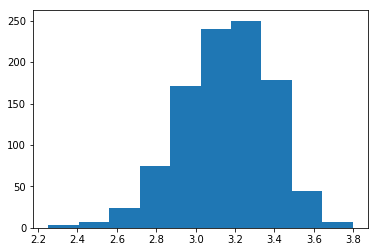

In [10]:
plt.hist(df_mod['D'])
plt.show()

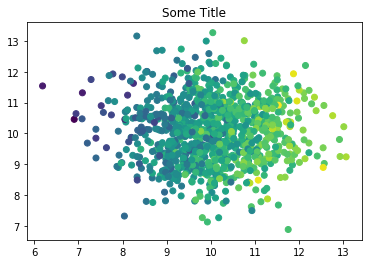

In [11]:
plt.scatter(df_mod['A'], df_mod['C'], c=df_mod['D'])
plt.title('Some Title')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

line = LinearRegression()

line.fit(df_mod[['A', 'C']], df_mod['D'])

line.score(df_mod[['A', 'C']], df_mod['D'])

0.5384242098482603